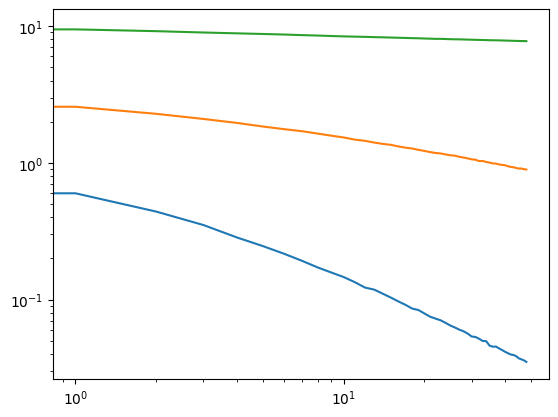

In [40]:
import numpy as np
import matplotlib.pyplot as plt

def closest_to_zero_std(Nsmpl: int, k: int, mu=0):
    """
    Nsmpl — число выборок
    k — размер каждой выборки
    """
    closest_points = []

    for _ in range(Nsmpl):
        sample = np.random.randn(k) + mu      # k значений N(0,1)
        x0 = sample[np.argmin(np.abs(sample))]   # точка, ближайшая к 0
        closest_points.append(x0)
        
    closest_points = np.array(closest_points)
    return np.sqrt(np.mean(closest_points**2)) # несмещённая std






In [86]:
import numpy as np
from scipy.stats import norm
from scipy.integrate import quad

def analytical_sigma(mu, sigma, k_array):
    """
    mu, sigma — параметры N(mu, sigma)
    k_array — скаляр или массив k, для которых нужно вычислить sigma_Y
    """

    k_array = np.atleast_1d(k_array)  # делаем k вектором

    # pdf N(mu, sigma)
    def fX(x):
        return norm.pdf((x - mu) / sigma) / sigma

    # CDF of |X|
    def F_abs(z):
        return norm.cdf((z - mu)/sigma) - norm.cdf((-z - mu)/sigma)

    # integrands
    def integrand_EY(z, k):
        # WARNING: your code had signs swapped — now fixed!
        return z * (fX(z) - fX(-z)) * (1 - F_abs(z))**(k - 1)

    def integrand_EY2(z, k):
        return z**2 * (fX(z) + fX(-z)) * (1 - F_abs(z))**(k - 1)

    results = np.zeros_like(k_array, dtype=float)

    for i, k in enumerate(k_array):
        EY  = k * quad(integrand_EY,  0, np.inf, args=(k,), limit=200)[0]
        EY2 = k * quad(integrand_EY2, 0, np.inf, args=(k,), limit=200)[0]
        var = EY2 - EY**2
        results[i] = np.sqrt(var)

    return results if len(results) > 1 else results[0]

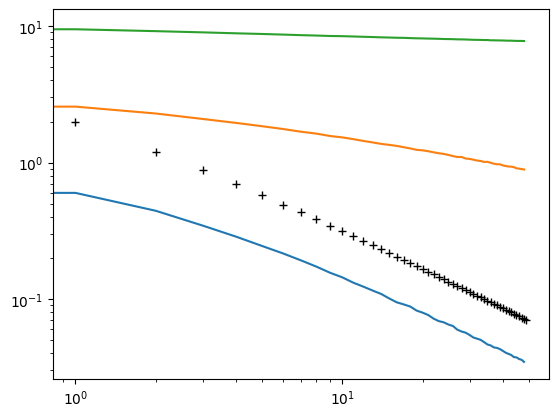

In [89]:
plt.clf()
for mu in [0, 3, 10]:
    sig_arr = []
    for n in range(1, 50):
        sig_arr.append(closest_to_zero_std(10000, n, mu))
    plt.plot(sig_arr)

k = np.arange(1, 50)
plt.plot(k, analytical_sigma(0, 2, k), 'k+')

plt.xscale('log')
plt.yscale('log')

plt.show()

#analytical_sigma(0, 1, k)

In [90]:
k = np.arange(1, 50)
analytical_sigma(0, 2, k)

array([2.        , 1.20562055, 0.87817646, 0.69484427, 0.57646271,
       0.49329443, 0.43148626, 0.3836615 , 0.34551273, 0.31434829,
       0.28839614, 0.2664403 , 0.24761773, 0.23129839, 0.21701131,
       0.20439722, 0.19317713, 0.18313106, 0.17408316, 0.16589113,
       0.1584386 , 0.15162942, 0.14538347, 0.13963345, 0.13432237,
       0.1294017 , 0.12482981, 0.12057079, 0.11659352, 0.11287089,
       0.10937914, 0.1060974 , 0.10300725, 0.10009234, 0.09733817,
       0.09473178, 0.09226155, 0.08991708, 0.08768899, 0.08556882,
       0.08354888, 0.08162225, 0.07978258, 0.07802411, 0.07634157,
       0.07473016, 0.07318544, 0.07170335, 0.07028017])